##Adquisición y Adecuación en dataset ADULT

In [38]:
from google.colab import files
files.upload()

Saving adult.data.csv to adult.data (2).csv


{'adult.data.csv': b'39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K\n50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K\n38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K\n53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K\n28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K\n37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K\n49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K\n52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 

##Importar librerias a usar


In [39]:

import pandas as pd ## manipulación y el análisis de datos 
import numpy as np ## cálculo numérico 
#Gráficos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from seaborn import boxplot


In [40]:
##creación del dataFrame y lectura del dataSet

COLUMNS2 = ['age', 'workclass',
            'fnlwgt', 'education',
            'education_num','marital-status','occupation',
            'relationship', 'race','sex',
            'capital_gain','capital_loss','hours_week',
            'native_country','salary']
df = pd.read_csv('adult.data.csv', names=COLUMNS2)

##DataSet de pruebas
dfTest = pd.read_csv('adult.data.csv', names=COLUMNS2)
nRow, nCol = df.shape

##Miramos cuantas filas y columnas tiene el dataset
print(f'Hay {nRow} filas y {nCol} columnas')

Hay 32561 filas y 15 columnas


##Mostrar una visualización de la tabla con datos importados:
En dicha tabla se puede observar la edad,el tipo de empleo y otros aspectos sobre la educación, su estado civil y temas de su economia.

In [41]:
##Visualizamos los primeros 10 registros del dataFrame
df.head(10)

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital-status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3      Married-civ-spouse   Handlers-cleaners         Husband   Black   
4      Married-civ-spouse      Prof-specialty            Wife   Black   
5      Married-civ-spouse     Exec-managerial            Wife   White   
6   Married-spouse-absent       Other-service   Not-in-family   Black   
7      Married-civ-spouse     Exec-managerial         Husband   White   
8           Never-married      Prof-specialty   Not-in-family   White   
9      Married-civ-spouse     Exec-managerial         Husband   White   

       sex  capital_gain  capital_loss  hours_week  native_country  salary  
0     Male          2174             0          40   United-States   <=50K  
1     Male             0             0          13   United-States   <=50K  
2     Male             0             0          40   United-States   <=50K  
3     Male             0             0          40   United-States   <=50K  
4   Female             0             0          40            Cuba   <=50K  
5   Female             0             0          40   United-States   <=50K  
6   Female             0             0          16         Jamaica   <=50K  
7     Male             0             0          45   United-States    >50K  
8   Female         14084             0          50   United-States    >50K  
9     Male          5178             0          40   United-States    >50K

In [42]:
##Información sobre la estructura de la tabla()  
##Se pueden ver tipos de datos y conocer si existen columnas con data faltante
df.info()

##El dataset no contiene valores vacios y tiene variables categóricas y númericas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_week      32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##Visualizar el número de elementos distintos o únicos

In [43]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_week           94
native_country       42
salary                2
dtype: int64

##Cálculo estádistico rápido

In [44]:
##con .T se intercambian labels

##Podemos ver una edad minina de 17, máxima de 90 años en las personas de las que se obtuvo la información
df.describe().T

count           mean            std      min       25%  \
age            32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt         32561.0  189778.366512  105549.977697  12285.0  117827.0   
education_num  32561.0      10.080679       2.572720      1.0       9.0   
capital_gain   32561.0    1077.648844    7385.292085      0.0       0.0   
capital_loss   32561.0      87.303830     402.960219      0.0       0.0   
hours_week     32561.0      40.437456      12.347429      1.0      40.0   

                    50%       75%        max  
age                37.0      48.0       90.0  
fnlwgt         178356.0  237051.0  1484705.0  
education_num      10.0      12.0       16.0  
capital_gain        0.0       0.0    99999.0  
capital_loss        0.0       0.0     4356.0  
hours_week         40.0      45.0       99.0

<Axes: xlabel='salary', ylabel='count'>

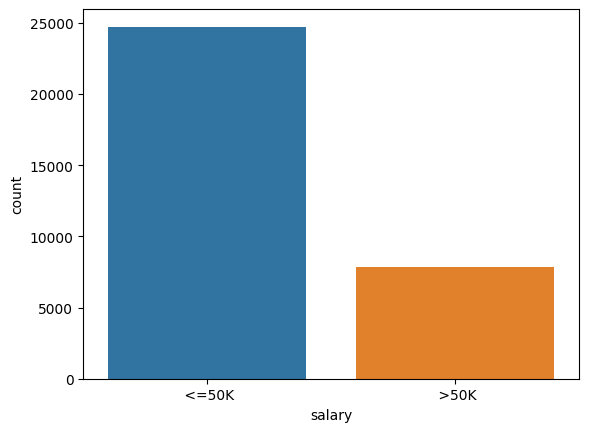

In [45]:
##Visualizaciòn sobre la columena de ingresos 
#sns.displot(x='salary',data=df, aspect=3, height=4 )
sns.countplot(x='salary',data=df )

##La mayor cantidad de población se encuentra con ganancia al año inferiores de los 50K

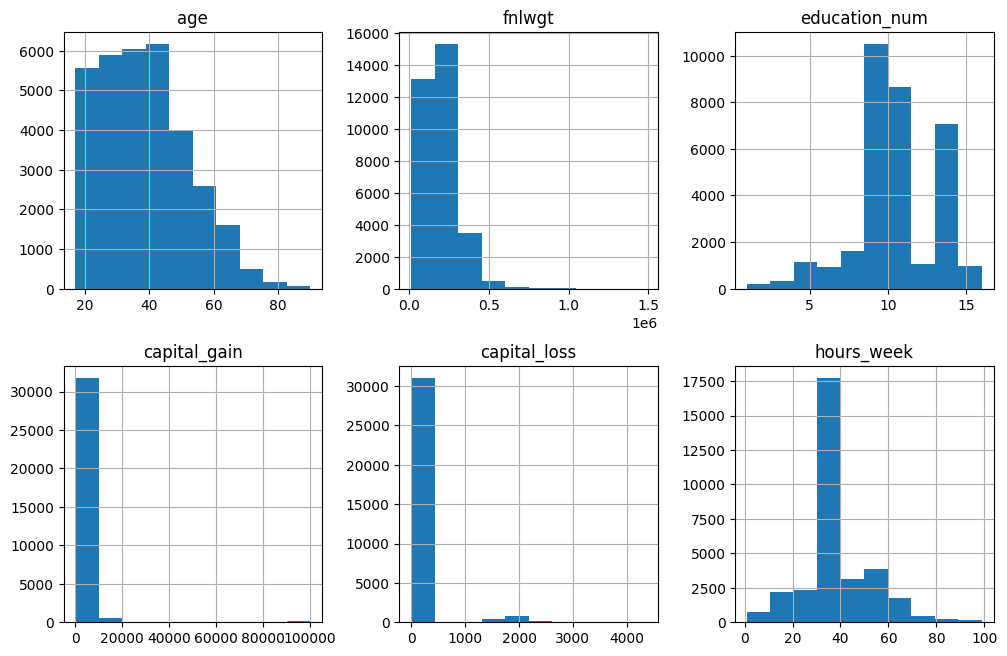

In [46]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

# Visualización con histograma de seaborn - Código tomado de clase 

Grilla de ploteo con matplotlib organizandi las gŕaficas generadas con seaborn


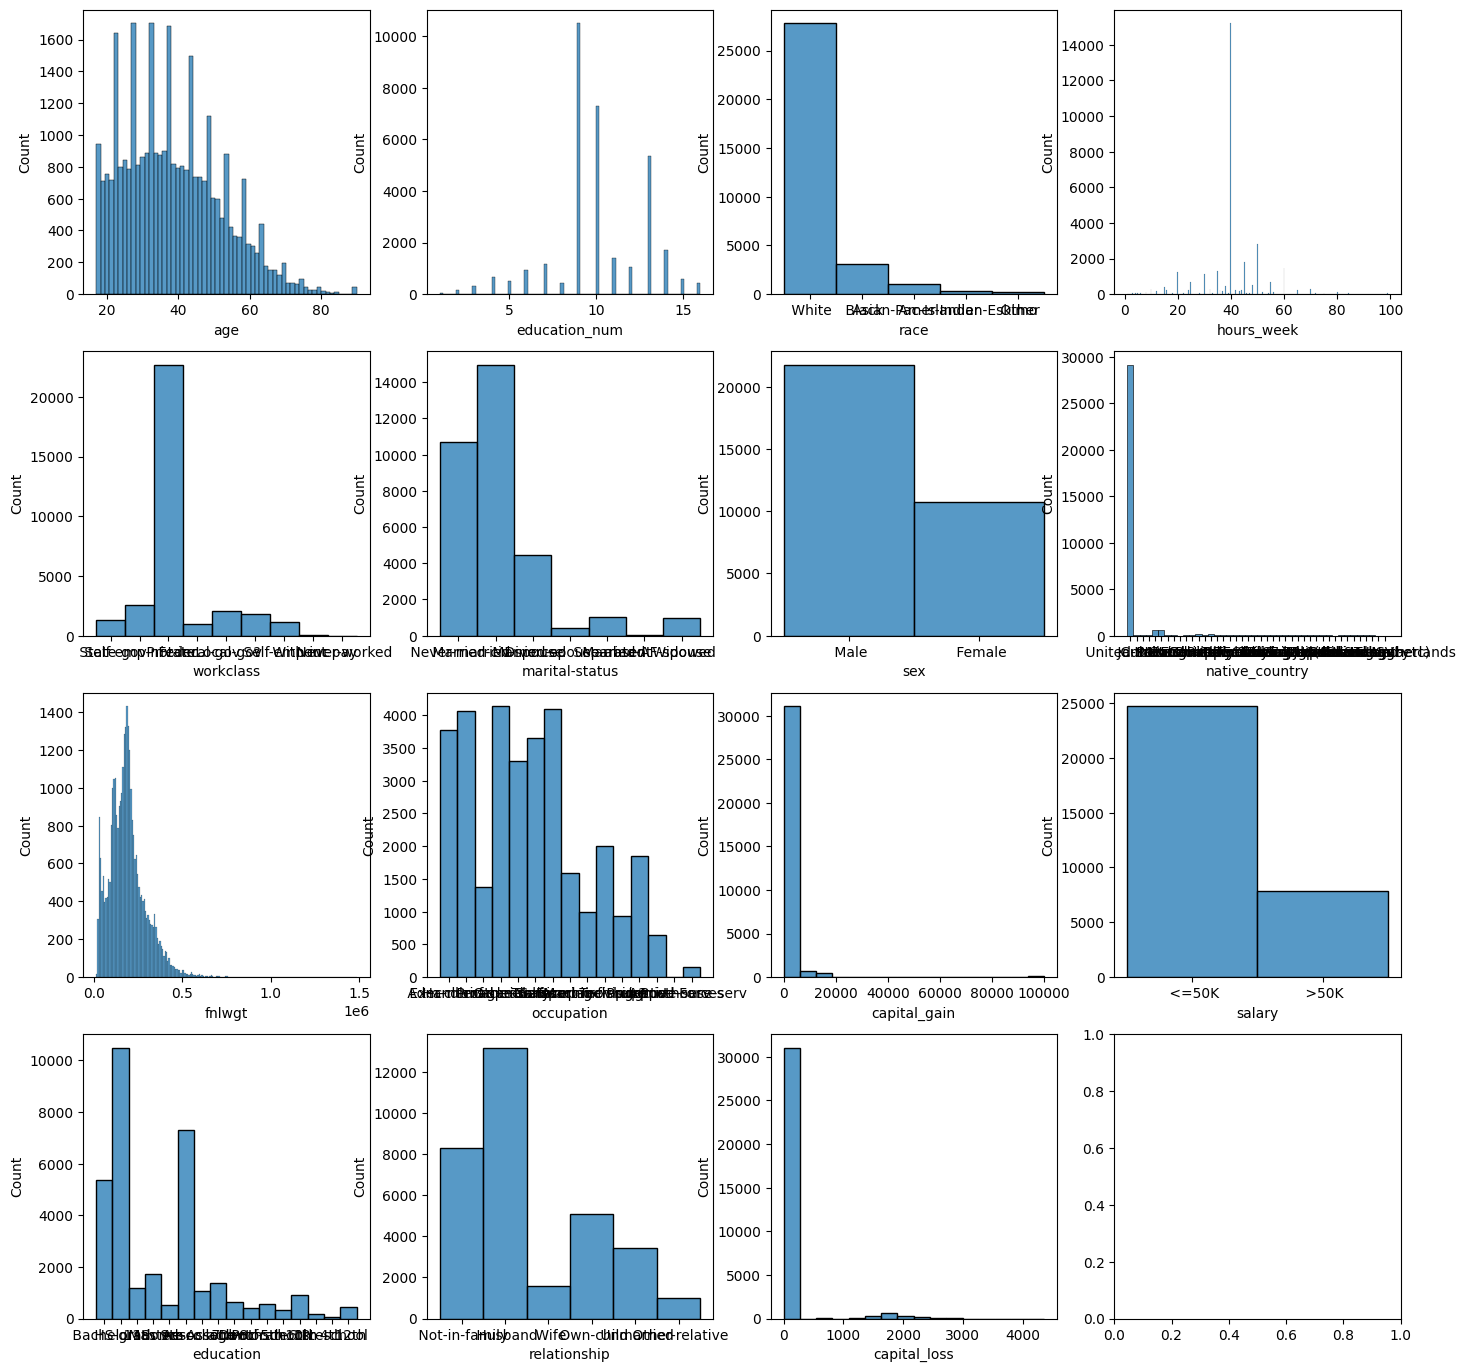

In [47]:
#Creación de dos variables que invocan el método subplots para darle el ancho y alto al gŕaficoi
fig,ax = plt.subplots(4,4, figsize= (17,17))

#Variable Características para relacionar los headers en na lista
caracteristicas = list(df.columns)
i,j= 0,0

#Se realiza un búcle para cada columna y que en ella se implemente el gŕafico .hisplot
for caracteristica in caracteristicas: 
  sns.histplot(x=caracteristica, data= df, ax= ax[i][j])
  i+=1
  if i>=4:
    i=0
    j+=1
##Mostrar gráfica
#ax.tick_params(axis='x', labelrotation=45)
#plt.xticks(rotation=45)
#fig.autofmt_xdate(rotation=45)
#plt.grid(True)
plt.show()    

##Relacionar dos variables para validar la relación y si influyen en obtener ingresos superiores a 50K


(-0.5, 1.5, 18.0, 100.0)

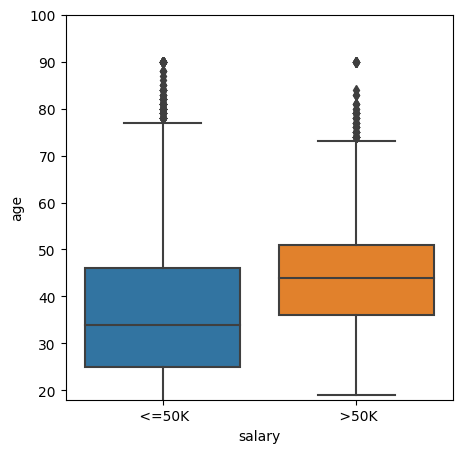

In [48]:
## salary < 50K =0 - salary > 50K =1
##variable ingreso que contiene el salary, para relacionar en el gráfico cada dato de la otra  variable a analizar y comparar con el resuldato de esa fila.
ingreso = 'salary'

#Caracteristicas del gráfico
f,ax = plt.subplots(figsize=(5,5))

#Creación de la gráfica
fig = sns.boxplot(x=ingreso, y= "age", data= df)

#limites para los ejes
fig.axis(ymin=18, ymax=100)

##Se puede deducir que para obetenr mayores ingresos el tener mas edad facilita sea posible


##Visualización de Ingresos vs otras variables

<Axes: xlabel='salary', ylabel='count'>

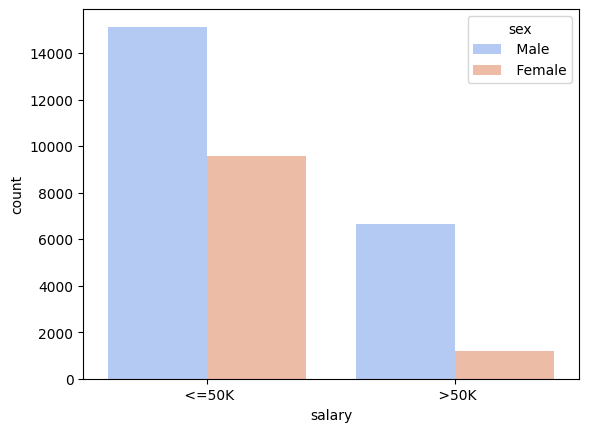

In [49]:
#Ingreso vs sex
sns.countplot(data= df, x=df['salary'], palette="coolwarm", hue="sex")

<Axes: xlabel='salary', ylabel='count'>

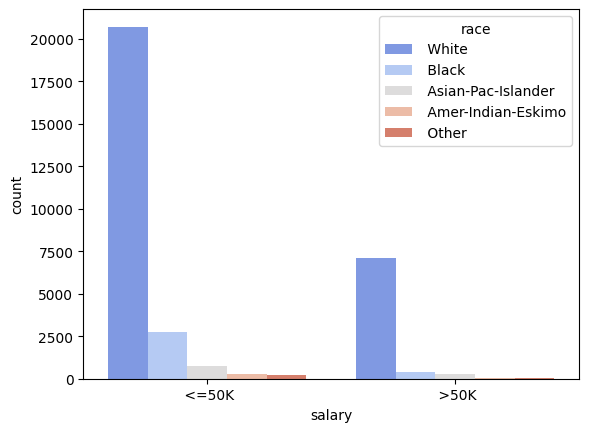

In [50]:
#Ingreso vs race
sns.countplot(data= df, x=df['salary'], palette="coolwarm", hue="race")

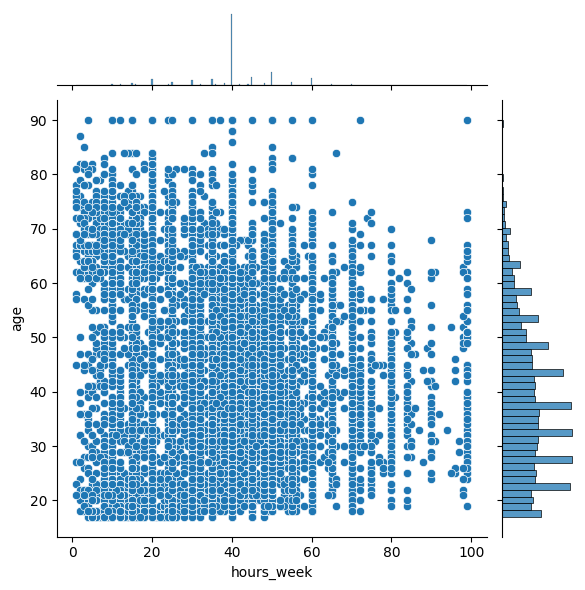

In [51]:
ax = sns.JointGrid(data = df,
                   x = "hours_week",
                   y = "age")
                   
ax.plot(sns.scatterplot, sns.histplot)

# Visualizando regresion lineal en los datos
Relaciones entre variables con regresión lineal

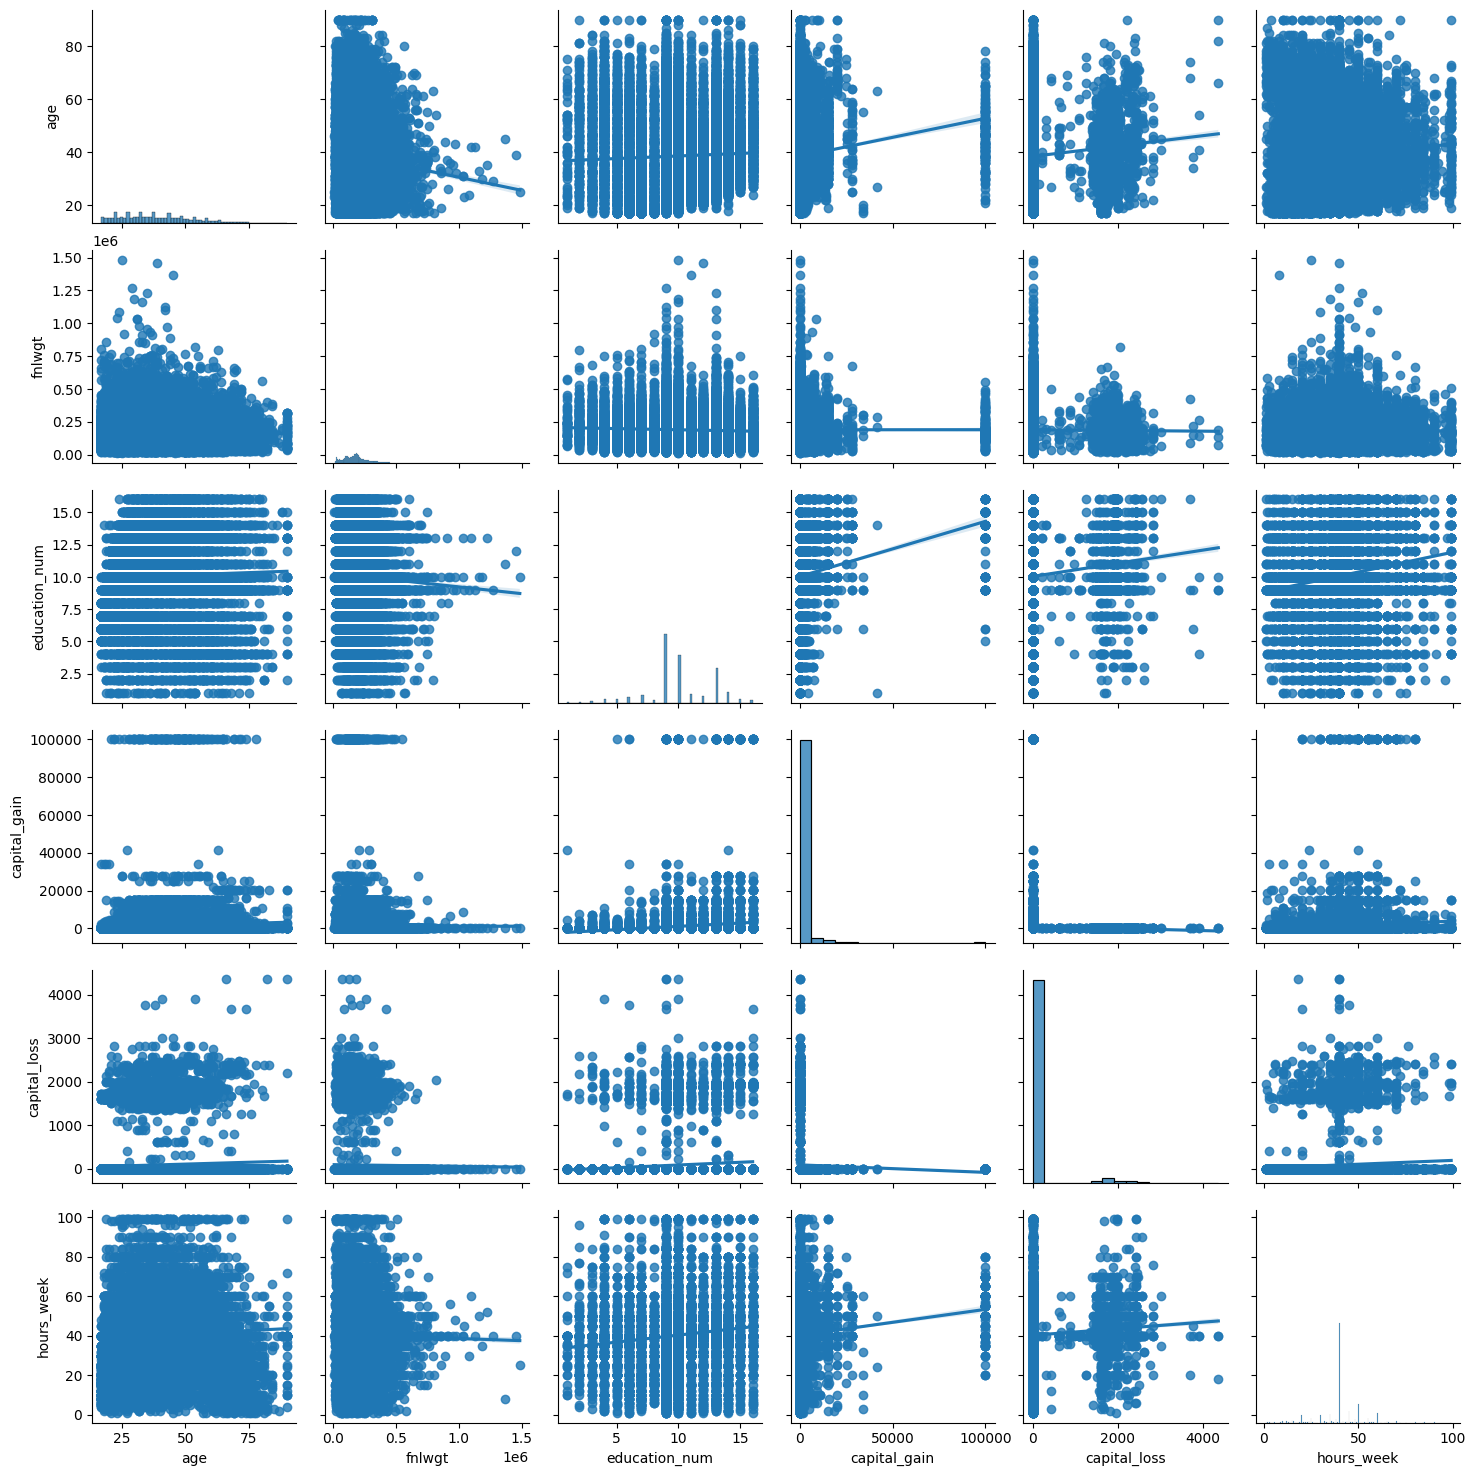

In [52]:
sns.pairplot(df, kind="reg")
## relacionar variables entre si  y resaltar color en relacion al resultado 1 o 0 - sns.pairplot(db, diag_kind= "kde", hue= "salary")

##Averiguar campos en 0 o nulas

In [53]:
## No hay valores nulos, pero de igual manera hay que revisar que los datos que se contienen sean adecuados, ya se encuentran valores con interrogantes
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_week        0
native_country    0
salary            0
dtype: int64

# Estudio de variables cat
##Validación con conteo de información en las columnas donde se evidencian datos erroneos identificados, marcados como ?



In [54]:
##Se evidencia que existen 1836 filas en donde workclass no tiene una información adecuada
# 1843 filas no tienen información adecuada en la columna occupation
## Hay 583 filas que no tienen el dato del país nativo
categorias = [i for i in df.columns if df[i].dtypes == "O"]

In [55]:
for caracteristica in categorias:
    print(f" {caracteristica}  :  {len(df[caracteristica].unique())}")

 workclass  :  9
 education  :  16
 marital-status  :  7
 occupation  :  15
 relationship  :  6
 race  :  5
 sex  :  2
 native_country  :  42
 salary  :  2


In [56]:
## Recorrer todas las variables identificadas como categoricas para vakidar cuales tienen valores incorrectos llenados como ?
for caracteristica in  categorias:
    print(df[caracteristica].value_counts()) 
    print("\n \n ")

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

 
 
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

 
 
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

 
 
 Prof-specialty       4140
 Craft-repair         4099
 

# Manejo de valores perdidos en características categóricas

Las columnas workclass, occupation y native_country contienen datos diligenciados con el signo ?, para complementar esa información serán llenados con la moda de cada uno de ellos.

In [57]:
#reemplazamos los ? con la moda
df['workclass'] = df['workclass'].str.replace('?', 'Private' ,regex = True)
df['occupation'] = df['occupation'].str.replace('?', 'Prof-specialty' ,regex = True)
df['native_country'] = df['native_country'].str.replace('?', 'United-States' ,regex = True)

In [58]:
#En la categoria de la columna de education, se pueden hacer ciertos arreglos para mantener mas uniformidad, lo mismo ocurre con las categorias de education, marital-status	

df["education"].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True ,regex = True)
df["education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' , inplace = True ,regex = True)


In [59]:
##Estado civil también se puede llevar a menos categorias
df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married',inplace = True ,regex = True)

df['marital-status'].replace(['Divorced', 'Separated','Widowed','Married-spouse-absent'], 'other' ,inplace = True ,regex = True)


In [60]:
##Los ingresos menores y superiores se pueden binarizar

df["salary"] = df["salary"].replace({'<=50K' : 0 , ">50K" : 1 } ,regex = True)


##Mapa de calor para identificar correlaciones entre variables, habiendo pasado el ingreso a 1 y 0

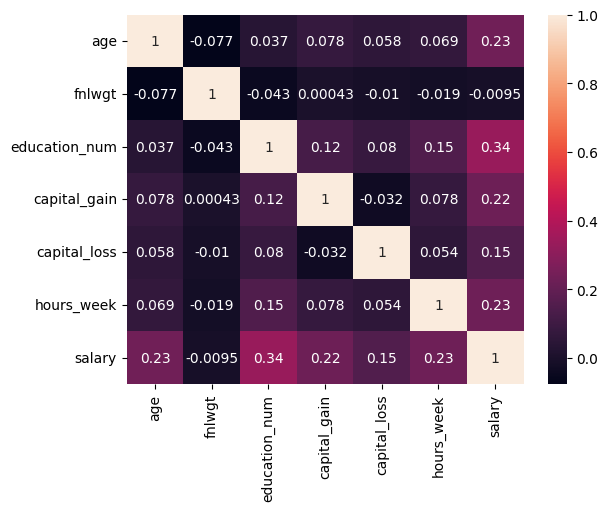

In [61]:
sns.heatmap(df.corr(), annot=True);

In [62]:
df.info()
#Convertir el tipo de dato del salario de object a #
df['salary'].astype('float64')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_week      32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32556    0.0
32557    1.0
32558    0.0
32559    0.0
32560    1.0
Name: salary, Length: 32561, dtype: float64

In [63]:
##Identificamos si los cambios en las variables categoricas fueron realizados
df.head(3)

age          workclass  fnlwgt   education  education_num  marital-status  \
0   39          State-gov   77516   Bachelors             13   Never-married   
1   50   Self-emp-not-inc   83311   Bachelors             13         married   
2   38            Private  215646     HS-grad              9           other   

           occupation    relationship    race    sex  capital_gain  \
0        Adm-clerical   Not-in-family   White   Male          2174   
1     Exec-managerial         Husband   White   Male             0   
2   Handlers-cleaners   Not-in-family   White   Male             0   

   capital_loss  hours_week  native_country  salary  
0             0          40   United-States       0  
1             0          13   United-States       0  
2             0          40   United-States       0

Anteriormente teniamos esta información en las categorias, después de el tratamiento podemos ver como queda en la siguiente linea

 workclass  :  9
 education  :  16
 marital-status  :  7
 occupation  :  15
 relationship  :  6
 race  :  5
 sex  :  2
 native_country  :  42
 income  :  2

# Creación del Modelo

In [64]:
#Para codificar datos categóricos  se utiliza:
#Se hace con el fin de asignar un valor númerico a una categoria por ejemplo reemplazar provate a 1 y que ese 1 sea ahora el nuevo valor
from sklearn.preprocessing import StandardScaler, LabelEncoder

df2= df.copy()
df2 = df2.apply(LabelEncoder().fit_transform)
df2.head()

age  workclass  fnlwgt  education  education_num  marital-status  \
0   22          6    2671          0             12               0   
1   33          5    2926          0             12               1   
2   21          3   14086          2              8               2   
3   36          3   15336          5              6               1   
4   11          3   19355          0             12               1   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0           0             1     4    1            25             0   
1           3             0     4    1             0             0   
2           5             1     4    1             0             0   
3           5             0     2    1             0             0   
4           9             5     2    0             0             0   

   hours_week  native_country  salary  
0          39              38       0  
1          12              38       0  
2          39              38       0  
3          39              38       0  
4          39               4       0

In [65]:
df.head()

age          workclass  fnlwgt   education  education_num  marital-status  \
0   39          State-gov   77516   Bachelors             13   Never-married   
1   50   Self-emp-not-inc   83311   Bachelors             13         married   
2   38            Private  215646     HS-grad              9           other   
3   53            Private  234721      school              7         married   
4   28            Private  338409   Bachelors             13         married   

           occupation    relationship    race      sex  capital_gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital_loss  hours_week  native_country  salary  
0             0          40   United-States       0  
1             0          13   United-States       0  
2             0          40   United-States       0  
3             0          40   United-States       0  
4             0          40            Cuba       0

Variables X y Y

In [66]:
#Variable dependiente
y= df2['salary']
print(y)
#Variables independientes
X= df2.drop('salary', axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64


# Conjunto de entrenamiento y pruebas

In [67]:
from sklearn.model_selection import train_test_split
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X,y, test_size=0.3, random_state=40)
#Al ver lo generado en X_entrenamiento podemos ver que las filas son aleatorias
X_entrenamiento

age  workclass  fnlwgt  education  education_num  marital-status  \
22807   36          3    9720          4              9               1   
7240     9          3    1477          2              8               1   
18266   40          3    8708          2              8               2   
32556   10          3   16528          4             11               1   
14359   21          3    2502          4              9               1   
...    ...        ...     ...        ...            ...             ...   
27640   21          3   14920          3             13               1   
14501    5          3   20191          2              8               0   
30727    4          3    4507          4              9               0   
14555    2          5   19474          5              6               1   
11590   16          5     116          2              8               2   

       occupation  relationship  race  sex  capital_gain  capital_loss  \
22807          11             0     4    1             0             0   
7240            2             0     4    1             0             0   
18266           0             1     4    0             0             0   
32556          12             5     4    0             0             0   
14359          11             0     4    1             0             0   
...           ...           ...   ...  ...           ...           ...   
27640           9             0     4    1           118             0   
14501          11             4     4    0             0             0   
30727           9             3     4    0             0             0   
14555           2             3     4    1             0            58   
11590           2             2     4    1             0             0   

       hours_week  native_country  
22807          24              38  
7240           39              38  
18266          44              38  
32556          37              38  
14359          49              38  
...           ...             ...  
27640          64              38  
14501          34              38  
30727           2              38  
14555          54              38  
11590          49              38  

[22792 rows x 14 columns]

# Entrenamiento y predicciones

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=1)
#con el valor de K indicado, se procede a entrarn el modelo
knn.fit(X_entrenamiento, y_entrenamiento)

KNeighborsClassifier(n_neighbors=1)

## Metodo de evaluación

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
prediccion = knn.predict(X_prueba)
prediccion
#Se crea una matriz de confusión en base a los datos de prueba y las predicciones
print(confusion_matrix(y_prueba, prediccion))

[[6093 1304]
 [1304 1068]]


In [70]:
#Presición
print(classification_report(y_prueba, prediccion))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      7397
           1       0.45      0.45      0.45      2372

    accuracy                           0.73      9769
   macro avg       0.64      0.64      0.64      9769
weighted avg       0.73      0.73      0.73      9769

